In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data = pd.read_csv("emails.csv")

In [3]:
X = data.drop(columns=["Email No.", "Prediction"], axis=1)
y = data["Prediction"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

In [7]:
svm = SVC(kernel='linear', C=1)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

In [8]:
print("===== K-Nearest Neighbors (KNN) Performance =====")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

print("\n===== Support Vector Machine (SVM) Performance =====")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

===== K-Nearest Neighbors (KNN) Performance =====
Accuracy: 0.8454106280193237
Confusion Matrix:
 [[593 146]
 [ 14 282]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.80      0.88       739
           1       0.66      0.95      0.78       296

    accuracy                           0.85      1035
   macro avg       0.82      0.88      0.83      1035
weighted avg       0.89      0.85      0.85      1035


===== Support Vector Machine (SVM) Performance =====
Accuracy: 0.9468599033816425
Confusion Matrix:
 [[707  32]
 [ 23 273]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       739
           1       0.90      0.92      0.91       296

    accuracy                           0.95      1035
   macro avg       0.93      0.94      0.94      1035
weighted avg       0.95      0.95      0.95      1035



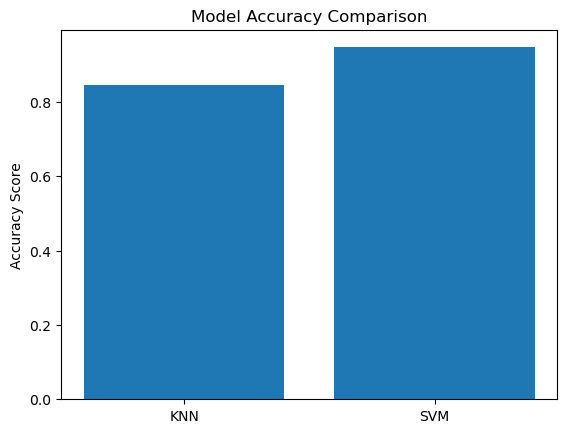

In [9]:
plt.bar(['KNN', 'SVM'], 
        [accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_svm)])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.show()